In [2]:
# Importing dependencies
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import seaborn as sns
import scipy.stats as st


In [3]:
# Creating directory & reading source file
airline_data = pd.read_csv("Data.csv")
airline_data.head()

,YEAR,MONTH,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,...,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,airline_name,Description,Code.y
0,2018,1,1/9/18 00:00,AS,498,14057,12892,-13.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX
1,2018,1,1/9/18 00:00,AS,502,14057,12892,-12.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX
2,2018,1,1/9/18 00:00,AS,532,14057,14679,-5.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX
3,2018,1,1/9/18 00:00,AS,540,14057,12892,-11.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX
4,2018,1,1/9/18 00:00,AS,544,14057,12892,-6.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX


In [4]:
# Determining the shape of dataset
print(airline_data.dtypes)
airline_data.shape


YEAR                     int64
MONTH                    int64
FL_DATE                 object
OP_UNIQUE_CARRIER       object
OP_CARRIER_FL_NUM        int64
ORIGIN_AIRPORT_ID        int64
DEST_AIRPORT_ID          int64
DEP_DELAY              float64
DEP_DELAY_NEW          float64
DEP_DEL15              float64
DEP_DELAY_GROUP        float64
ARR_DELAY              float64
ARR_DELAY_NEW          float64
ARR_DEL15              float64
ARR_DELAY_GROUP        float64
CANCELLED                int64
CANCELLATION_CODE       object
DIVERTED                 int64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
airline_name            object
Description             object
Code.y                  object
dtype: object


(2359976, 26)

In [5]:
# Checking for null counts to deteremine the validity of info provided in data set
null_counts = airline_data.isnull().sum()
print(null_counts)


YEAR                         0
MONTH                        0
FL_DATE                      0
OP_UNIQUE_CARRIER            0
OP_CARRIER_FL_NUM            0
ORIGIN_AIRPORT_ID            0
DEST_AIRPORT_ID              0
DEP_DELAY                45474
DEP_DELAY_NEW            45474
DEP_DEL15                45474
DEP_DELAY_GROUP          45474
ARR_DELAY                51526
ARR_DELAY_NEW            51526
ARR_DEL15                51526
ARR_DELAY_GROUP          51526
CANCELLED                    0
CANCELLATION_CODE      2313116
DIVERTED                     0
CARRIER_DELAY          1916035
WEATHER_DELAY          1916035
NAS_DELAY              1916035
SECURITY_DELAY         1916035
LATE_AIRCRAFT_DELAY    1916035
airline_name                 0
Description                  0
Code.y                       0
dtype: int64


In [6]:
# Creating subset 
SUBSET_COLS = ["ORIGIN_AIRPORT_ID", "Description", "Code.y",  "OP_UNIQUE_CARRIER",
               "airline_name", "YEAR", "MONTH", "FL_DATE", "OP_CARRIER_FL_NUM",
               "DEST_AIRPORT_ID", "DEP_DELAY","ARR_DELAY", "CANCELLED", "DIVERTED"]

subset_data = airline_data.loc[:, SUBSET_COLS].dropna()


null_counts = subset_data.isnull().sum()
print(null_counts)
print(subset_data.shape)

ORIGIN_AIRPORT_ID    0
Description          0
Code.y               0
OP_UNIQUE_CARRIER    0
airline_name         0
YEAR                 0
MONTH                0
FL_DATE              0
OP_CARRIER_FL_NUM    0
DEST_AIRPORT_ID      0
DEP_DELAY            0
ARR_DELAY            0
CANCELLED            0
DIVERTED             0
dtype: int64
(2308450, 14)


In [7]:
# Counting cancelled & diverted flights
cancelled_count = airline_data['CANCELLED'].value_counts().get(1, 0)

diverted_count = airline_data['DIVERTED'].value_counts().get(1, 0)

print("Number of rows = 1:", cancelled_count)
print("Number of rows = 1:", diverted_count)

Number of rows = 1: 46860
Number of rows = 1: 4667


In [8]:
# Counting values in the cancellation code column
airline_data["CANCELLATION_CODE"].value_counts()

A    24655
B    13747
D     6164
C     2294
Name: CANCELLATION_CODE, dtype: int64

In [9]:
# Checking min/max values in all columns
airline_data.describe()

,YEAR,MONTH,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,2.359976e+06,2.359976e+06,2.359976e+06,2.359976e+06,2.359976e+06,2.314502e+06,2.314502e+06,2.314502e+06,2.314502e+06,2.308450e+06,2.308450e+06,2.308450e+06,2.308450e+06,2.359976e+06,2.359976e+06,443941.000000,443941.000000,443941.000000,443941.000000,443941.000000
mean,2.019748e+03,6.296430e+00,8.777711e+02,1.297191e+04,1.300940e+04,8.125578e+00,1.248565e+01,1.790994e-01,-3.617495e-02,3.515730e+00,1.290445e+01,1.923117e-01,-2.508163e-01,1.985613e-02,1.977562e-03,17.292633,1.910896,20.538524,0.262431,21.697437
std,1.363459e+00,3.410495e+00,6.871444e+02,1.543660e+03,1.532922e+03,4.198176e+01,4.038674e+01,3.834356e-01,2.167581e+00,4.429626e+01,4.012295e+01,3.941167e-01,2.309937e+00,1.395058e-01,4.442581e-02,48.445608,17.868101,40.467277,4.113304,51.083581
min,2.018000e+03,1.000000e+00,1.000000e+00,1.014000e+04,1.014000e+04,-1.140000e+02,0.000000e+00,0.000000e+00,-2.000000e+00,-1.060000e+02,0.000000e+00,0.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.019000e+03,3.000000e+00,3.780000e+02,1.143300e+04,1.161800e+04,-7.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.600000e+01,0.000000e+00,0.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.020000e+03,6.000000e+00,7.290000e+02,1.319800e+04,1.320400e+04,-3.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-6.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,10.000000,0.000000,0.000000
75%,2.021000e+03,9.000000e+00,1.185000e+03,1.463500e+04,1.467900e+04,6.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,17.000000,0.000000,25.000000,0.000000,23.000000
max,2.022000e+03,1.200000e+01,7.951000e+03,1.599100e+04,1.599100e+04,1.527000e+03,1.527000e+03,1.000000e+00,1.200000e+01,1.527000e+03,1.527000e+03,1.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,1512.000000,1236.000000,1515.000000,428.000000,1520.000000


In [10]:
# To determine the datatypes in the dataframe
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359976 entries, 0 to 2359975
Data columns (total 26 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   FL_DATE              object 
 3   OP_UNIQUE_CARRIER    object 
 4   OP_CARRIER_FL_NUM    int64  
 5   ORIGIN_AIRPORT_ID    int64  
 6   DEST_AIRPORT_ID      int64  
 7   DEP_DELAY            float64
 8   DEP_DELAY_NEW        float64
 9   DEP_DEL15            float64
 10  DEP_DELAY_GROUP      float64
 11  ARR_DELAY            float64
 12  ARR_DELAY_NEW        float64
 13  ARR_DEL15            float64
 14  ARR_DELAY_GROUP      float64
 15  CANCELLED            int64  
 16  CANCELLATION_CODE    object 
 17  DIVERTED             int64  
 18  CARRIER_DELAY        float64
 19  WEATHER_DELAY        float64
 20  NAS_DELAY            float64
 21  SECURITY_DELAY       float64
 22  LATE_AIRCRAFT_DELAY  float64
 23  airline_name         object 
 24

In [11]:
# Defining Max to calculate max value in Arrival Delay

def actual_delay(raw_delay):
    corrected_delay = max(0, raw_delay)
    return corrected_delay

In [12]:
# Calculating total arrival and departure delay to figure out on-time performance
subset_data["ARR_DELAY"].map(actual_delay)


0            0.0
1            0.0
2            0.0
3            0.0
4           12.0
           ...  
2359970     16.0
2359971    165.0
2359972    119.0
2359973     33.0
2359974     44.0
Name: ARR_DELAY, Length: 2308450, dtype: float64

In [13]:
# Creating a new column for total delay
subset_data["ADJ_DELAY"]= subset_data["ARR_DELAY"].map(actual_delay)
subset_data.to_csv("Updated_Data.csv", index=False)


In [14]:
# Creating a subset of delay times 
subset_data[["ADJ_DELAY", "ARR_DELAY", "DEP_DELAY"]]

,ADJ_DELAY,ARR_DELAY,DEP_DELAY
0,0.0,-46.0,-13.0
1,0.0,-2.0,-12.0
2,0.0,-8.0,-5.0
3,0.0,-23.0,-11.0
4,12.0,12.0,-6.0
...,...,...,...
2359970,16.0,16.0,-2.0
2359971,165.0,165.0,173.0
2359972,119.0,119.0,120.0
2359973,33.0,33.0,41.0


In [15]:
# Calculate the on-time performance for each airline
total_flights = subset_data.shape[0]
on_time_flights = subset_data[(subset_data["ADJ_DELAY"] <= 0)].shape[0]
on_time_performance = (on_time_flights/ total_flights) * 100

In [16]:
# Calculating # of on-time flights for each airline
on_time_flights = len(subset_data[subset_data["ADJ_DELAY"] == 0])
print(f"Number of on-time flights: {on_time_flights}")
on_time_flights = subset_data[subset_data["ADJ_DELAY"] == 0].groupby("airline_name").size()
print(on_time_flights)

Number of on-time flights: 1494196
airline_name
Alaska      618994
Frontier    340804
Spirit      534398
dtype: int64


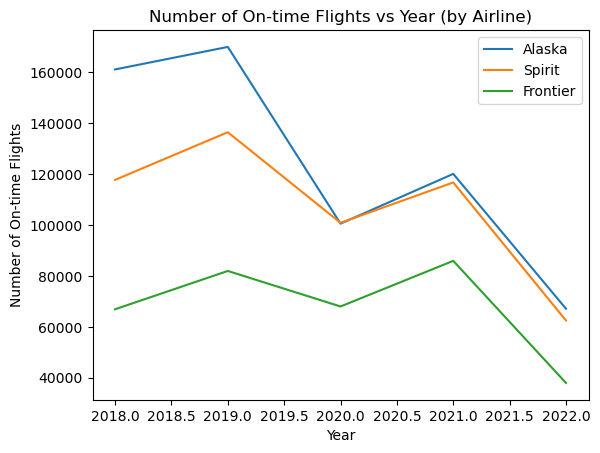

In [17]:
# Group data by year and airline, and count the number of on-time flights
on_time_counts = subset_data[subset_data["ADJ_DELAY"] == 0].groupby(["YEAR", "airline_name"]).size()

# Get unique airlines in the dataset
airlines = subset_data["airline_name"].unique()

# Plot the lines for each airline
for airline in airlines:
    # Select data for the current airline
    airline_counts = on_time_counts.loc[:, airline]
    
    # Plot the line for the current airline
    plt.plot(airline_counts.index.get_level_values("YEAR"), airline_counts.values, label=airline)

plt.xlabel("Year")
plt.ylabel("Number of On-time Flights")
plt.title("Number of On-time Flights vs Year (by Airline)")
plt.legend()
plt.show()

rvalue: -0.45594067421361223


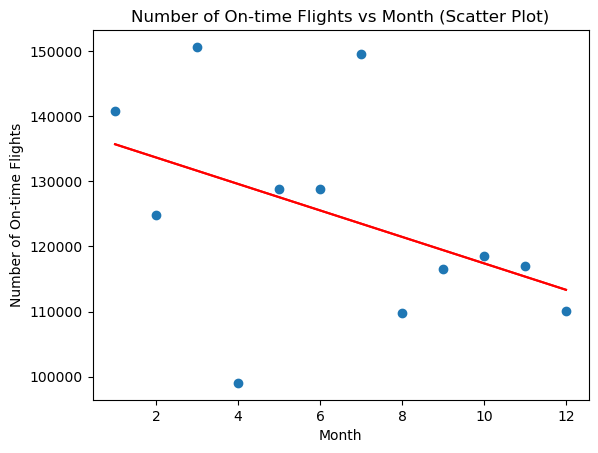

In [24]:
# Filter on-time flights (TOTAL_DELAY = 0)
on_time_flights = subset_data[subset_data["ADJ_DELAY"] == 0]

# Count the number of on-time flights per month
monthly_counts = on_time_flights.groupby("MONTH").size()

# Calculate the regression line coefficients
x = monthly_counts.index
y = monthly_counts.values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print("rvalue:", rvalue)

# Create scatter plot
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(12000,14000),fontsize=56,color="red")
plt.xlabel("Month")
plt.ylabel("Number of On-time Flights")
plt.title("Number of On-time Flights vs Month (Scatter Plot)")
plt.plot(x,regress_values,"r-")

plt.show()

SUMMARY


- Since the r-value is less than 0.3, there is a very weak correlation between the Month of any given year and the on-time performance of an airline.
- 2019 had higher on-time performance which could contribute to the fact that limited flights ran throughout the year
- There's a sudden drop in the on-time performance during 2022 as the dataset only consists of information for half the year

LIMITATIONS

- Determining actual delay timings
- Data size

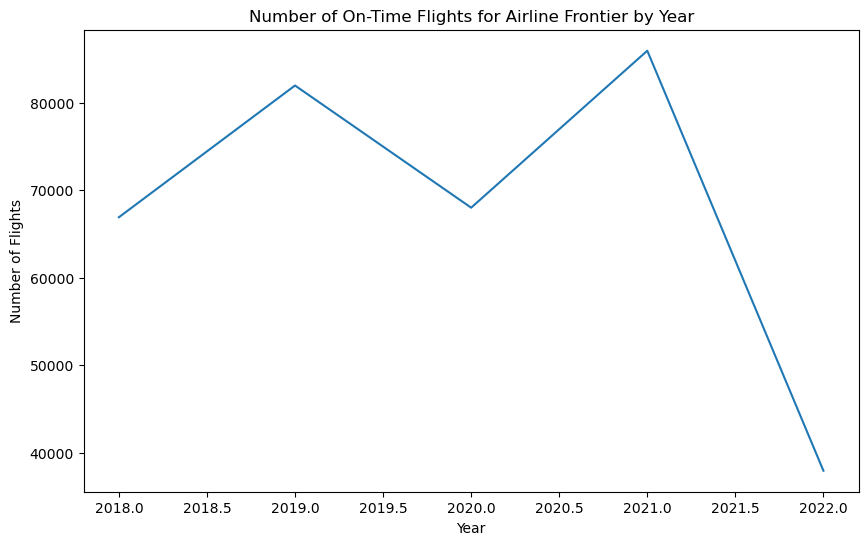

In [19]:
# On time performance for Frontier
airline_code = 'Frontier'  

# Filter the dataset for on-time flights of the specific airline
on_time_flights = subset_data[(subset_data['ADJ_DELAY'] == 0) & (subset_data['airline_name'] == airline_code)]

# Group the data by year and count the number of flights
flight_counts = on_time_flights.groupby('YEAR').size()

# Plot the number of on-time flights for the specific airline per year
flight_counts.plot(kind='line', figsize=(10, 6))

# Customize the plot
plt.title(f'Number of On-Time Flights for Airline {airline_code} by Year')
plt.xlabel('Year')
plt.ylabel('Number of Flights')

# Show the plot
plt.show()

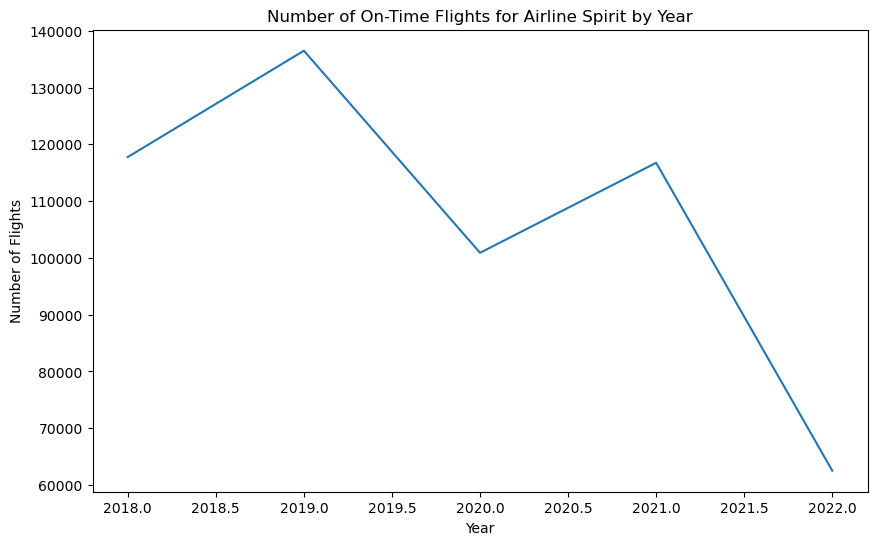

In [20]:
# On time performance for Spirit
airline_code = 'Spirit'  

# Filter the dataset for on-time flights of the specific airline
on_time_flights = subset_data[(subset_data['ADJ_DELAY'] == 0) & (subset_data['airline_name'] == airline_code)]

# Group the data by year and count the number of flights
flight_counts = on_time_flights.groupby('YEAR').size()

# Plot the number of on-time flights for the specific airline per year
flight_counts.plot(kind='line', figsize=(10, 6))

# Customize the plot
plt.title(f'Number of On-Time Flights for Airline {airline_code} by Year')
plt.xlabel('Year')
plt.ylabel('Number of Flights')

# Show the plot
plt.show()

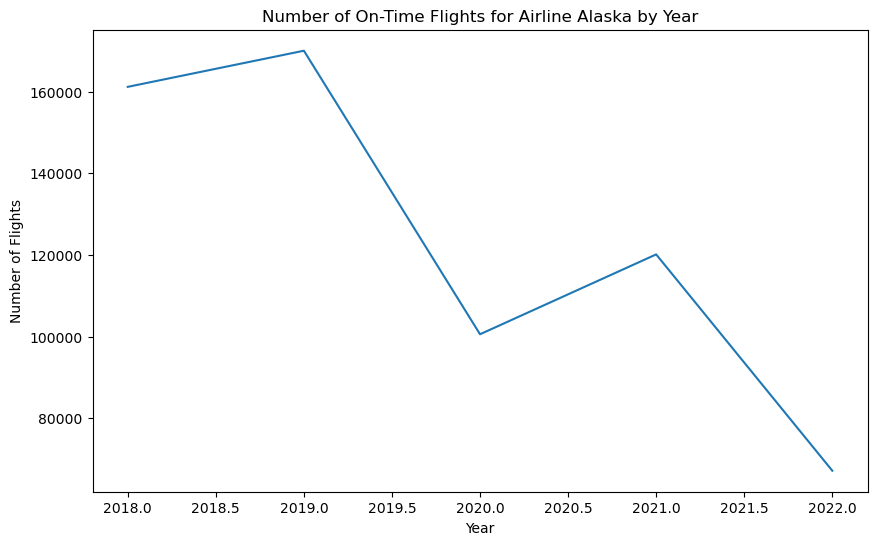

In [21]:
# On time performance for Alaska
airline_code = 'Alaska'  

# Filter the dataset for on-time flights of the specific airline
on_time_flights = subset_data[(subset_data['ADJ_DELAY'] == 0) & (subset_data['airline_name'] == airline_code)]

# Group the data by year and count the number of flights
flight_counts = on_time_flights.groupby('YEAR').size()

# Plot the number of on-time flights for the specific airline per year
flight_counts.plot(kind='line', figsize=(10, 6))

# Customize the plot
plt.title(f'Number of On-Time Flights for Airline {airline_code} by Year')
plt.xlabel('Year')
plt.ylabel('Number of Flights')

# Show the plot
plt.show()

Airlines with the highest on-time performance:
airline_name
Spirit      66.173828
Alaska      65.268563
Frontier    61.683647
dtype: float64


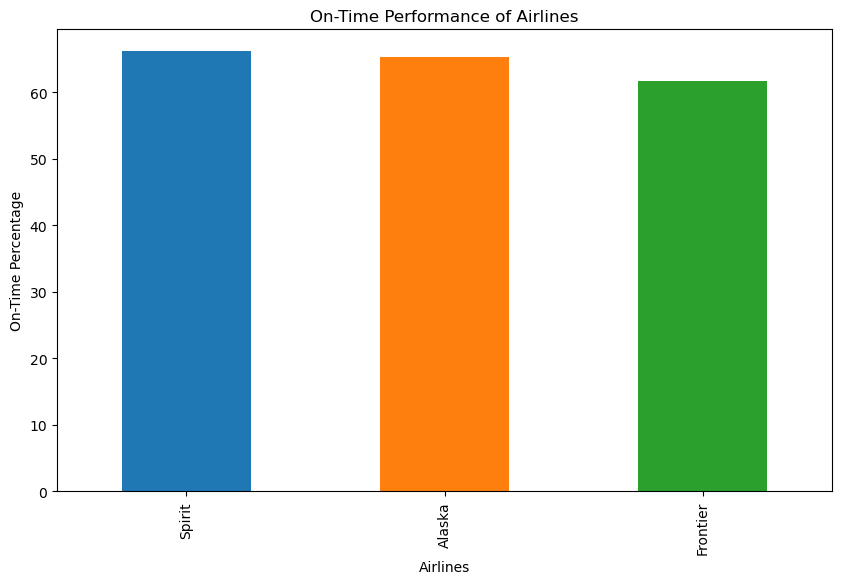

In [22]:
# Calculate the total number of flights for each airline
total_flights = subset_data.groupby('airline_name').size()

# Calculate the number of on-time flights for each airline
on_time_flights = subset_data[subset_data['ADJ_DELAY'] == 0].groupby('airline_name').size()

# Calculate the percentage of on-time flights for each airline
on_time_percentage = (on_time_flights / total_flights) * 100

# Sort the airlines based on the on-time percentage in descending order
sorted_airlines = on_time_percentage.sort_values(ascending=False)

# Print the airlines with the highest on-time performance
print("Airlines with the highest on-time performance:")
print(sorted_airlines.head())

# Generate a list of colors for each airline
colors = plt.cm.tab10(np.arange(len(sorted_airlines)))

# Visualize the on-time performance using a bar plot with different colors
plt.figure(figsize=(10, 6))
sorted_airlines.plot(kind='bar', color=colors)
plt.xlabel('Airlines')
plt.ylabel('On-Time Percentage')
plt.title('On-Time Performance of Airlines')
plt.show()